# 檢視與處理 Outliers
### 為何會有 outliers, 常見的 outlier 原因
* 未知值，隨意填補 (約定俗成的代入)，如年齡常見 0,999
* 可能的錯誤紀錄/手誤/系統性錯誤，如某本書在某筆訂單的銷售量 = 1000 本

# [作業目標]
- 依照下列提示與引導, 以幾種不同的方式, 檢視可能的離群值

# [作業重點]
- 從原始資料篩選可能的欄位, 看看那些欄位可能有離群值 (In[3], Out[3])
- 繪製目標值累積密度函數(ECDF)的圖形, 和常態分布的累積密度函數對比, 以確認是否有離群值的情形 (In[6], Out[6], In[7], Out[7])

In [130]:
# # Import 需要的套件
# import os
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt

# %matplotlib inline

# # 設定 data_path
# dir_data = './data'

In [131]:
# f_app = os.path.join(dir_data, 'application_train.csv')
# print('Path of read in data: %s' % (f_app))
# app_train = pd.read_csv(f_app)
# app_train.head()

In [2]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 設定 data_path
path = '/Users/liaoshousan/Desktop/3rd-ML100Days/Dataset'
f_app = os.path.join(path, 'application_train.csv')
app_train = pd.read_csv(f_app)
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 請參考 HomeCredit_columns_description.csv 的欄位說明，觀察並列出三個你覺得可能有 outlier 的欄位並解釋可能的原因

AMT_INCOME_TOTAL                 AxesSubplot(0.125,0.125;0.0455882x0.755)
REGION_POPULATION_RELATIVE    AxesSubplot(0.489706,0.125;0.0455882x0.755)
OBS_60_CNT_SOCIAL_CIRCLE      AxesSubplot(0.854412,0.125;0.0455882x0.755)
dtype: object


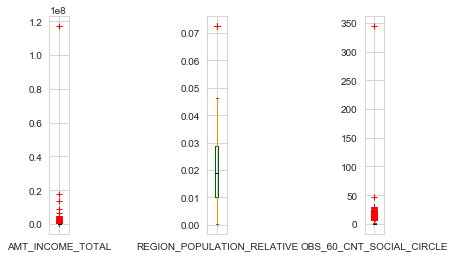

In [133]:
# 先篩選數值型的欄位
int_features = []
float_features = []
object_features = []
for dtype, feature in zip(app_train.dtypes, app_train.columns):
    if dtype == 'float64':
        float_features.append(feature)
    elif dtype == 'int64':
        int_features.append(feature)
    else:
        object_features.append(feature)

app_train[float_features].head()

##觀察完後發現有三個欄位有異常值，開新的dataframe來分析

fig,axes = plt.subplots(1,3)
color = dict(boxes='DarkGreen', whiskers='DarkOrange',
              medians='DarkBlue', caps='Red')
# boxes表示箱體，whisker表示觸鬚線，medians表示中位數，caps表示最大與最小值界限

#把可疑的3個欄位拿出來畫盒狀圖
df = pd.DataFrame()
df['AMT_INCOME_TOTAL'] = app_train[float_features]['AMT_INCOME_TOTAL']
df['REGION_POPULATION_RELATIVE'] = app_train[float_features]['REGION_POPULATION_RELATIVE']
df['OBS_60_CNT_SOCIAL_CIRCLE'] = app_train[float_features]['OBS_60_CNT_SOCIAL_CIRCLE'] 

# sym引數表示異常值標記的方式
plt.subplots_adjust(wspace=7,hspace=7)  # 調整子圖之間的間距
print(df.plot(kind='box',subplots=True, ax = axes, color=color,sym='r+'))

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 3 columns):
AMT_INCOME_TOTAL              307511 non-null float64
REGION_POPULATION_RELATIVE    307511 non-null float64
OBS_60_CNT_SOCIAL_CIRCLE      306490 non-null float64
dtypes: float64(3)
memory usage: 7.0 MB


In [134]:
app_train.select_dtypes(include=["float"]).apply(pd.Series.nunique, axis = 0)

AMT_INCOME_TOTAL                  2548
AMT_CREDIT                        5603
AMT_ANNUITY                      13672
AMT_GOODS_PRICE                   1002
REGION_POPULATION_RELATIVE          81
DAYS_REGISTRATION                15688
OWN_CAR_AGE                         62
CNT_FAM_MEMBERS                     17
EXT_SOURCE_1                    114584
EXT_SOURCE_2                    119831
EXT_SOURCE_3                       814
APARTMENTS_AVG                    2339
BASEMENTAREA_AVG                  3780
YEARS_BEGINEXPLUATATION_AVG        285
YEARS_BUILD_AVG                    149
COMMONAREA_AVG                    3181
ELEVATORS_AVG                      257
ENTRANCES_AVG                      285
FLOORSMAX_AVG                      403
FLOORSMIN_AVG                      305
LANDAREA_AVG                      3527
LIVINGAPARTMENTS_AVG              1868
LIVINGAREA_AVG                    5199
NONLIVINGAPARTMENTS_AVG            386
NONLIVINGAREA_AVG                 3290
APARTMENTS_MODE          

In [135]:
# 從上面的圖檢查的結果，至少這三個欄位好像有點可疑

# AMT_INCOME_TOTAL
# REGION_POPULATION_RELATIVE
# OBS_60_CNT_SOCIAL_CIRCLE

### Hints: Emprical Cumulative Density Plot, [ECDF](https://zh.wikipedia.org/wiki/%E7%BB%8F%E9%AA%8C%E5%88%86%E5%B8%83%E5%87%BD%E6%95%B0), [ECDF with Python](https://stackoverflow.com/questions/14006520/ecdf-in-python-without-step-function)

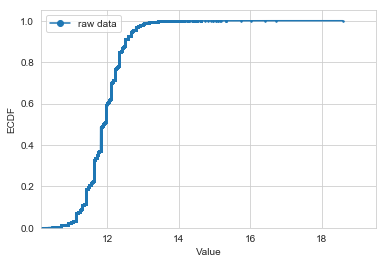

In [136]:
# 最大值離平均與中位數很遠
# print(app_train['AMT_INCOME_TOTAL'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
def ecdf(data):
    xlist = [ ]
    ylist = [ ]
    number = data.shape[0]
    data = df.sort_values(by = 'AMT_INCOME_TOTAL')
    for i in range(number):
        x = data['AMT_INCOME_TOTAL'].iloc[i]
        y = i/number
        xlist.append(np.log(x))  #不然 x range太大了
        ylist.append(y)
    xmin =xlist[0]
    xmax = xlist[int(len(xlist))-1]
    plt.plot(xlist,ylist, marker = '.', markersize = 3, label = 'raw data')
    plt.legend(markerscale = 4)
    plt.xlim(xmin,xmax*1.05)# 限制顯示圖片的範圍
    plt.ylim(0,1.05) # 限制顯示圖片的範圍
    plt.xlabel('Value') 
    plt.ylabel('ECDF') 
    return plt.show()

ecdf(df)


## 補充：Normal dist 的 ECDF
![ecdf_normal](https://au.mathworks.com/help/examples/stats/win64/PlotEmpiricalCdfAndCompareWithSamplingDistributionExample_01.png)

count    307511.000000
mean          0.020868
std           0.013831
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64


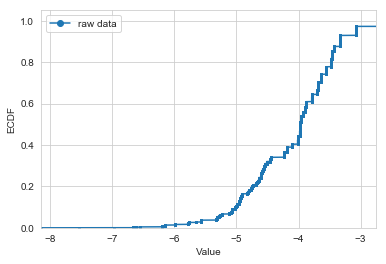

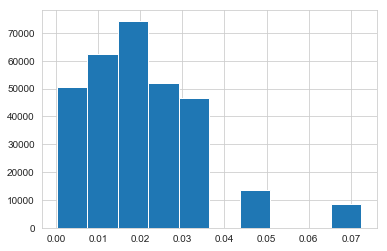

0.035792    16408
0.046220    13442
0.030755    12163
0.025164    11950
0.026392    11601
0.031329    11321
0.028663    11157
0.019101     8694
0.072508     8412
0.020713     8066
0.018850     7668
0.020246     7178
0.018634     7038
0.022625     6943
0.015221     6824
0.032561     6636
0.024610     6404
0.019689     6172
0.018029     6167
0.018801     6108
0.018209     6052
0.014520     4785
0.016612     4408
0.007020     4105
0.022800     3807
0.010032     3570
0.010006     3563
0.014464     3422
0.004960     3300
0.011703     3252
            ...  
0.006008     1796
0.003069     1783
0.008575     1763
0.008474     1740
0.007274     1724
0.007114     1684
0.006305     1672
0.008068     1668
0.008866     1654
0.006671     1653
0.002042     1642
0.003813     1616
0.005084     1482
0.006296     1225
0.005313     1218
0.003818     1212
0.003122     1147
0.006233     1087
0.005002     1068
0.002134     1051
0.004849     1038
0.005144      967
0.002506      944
0.003541      627
0.001276  

In [137]:
# 最大值落在分布之外
print(app_train['REGION_POPULATION_RELATIVE'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
def ecdf(data):
    xlist = [ ]
    ylist = [ ]
    number = data.shape[0]
    data = df.sort_values(by = 'REGION_POPULATION_RELATIVE')
    for i in range(number):
        x = data['REGION_POPULATION_RELATIVE'].iloc[i]
        y = i/number
        xlist.append(np.log(x))  #不然 x range太大了
        ylist.append(y)
    xmin =xlist[0]
    xmax = xlist[int(len(xlist))-1]
    plt.plot(xlist,ylist, marker = '.', markersize = 3, label = 'raw data')
    plt.legend(markerscale = 4)
    plt.xlim(xmin,xmax*1.05)# 限制顯示圖片的範圍
    plt.ylim(0,1.05) # 限制顯示圖片的範圍
    plt.xlabel('Value') 
    plt.ylabel('ECDF') 
    return plt.show()

ecdf(df)


df['REGION_POPULATION_RELATIVE'].hist()
plt.show()

df['REGION_POPULATION_RELATIVE'].value_counts()

# 就以這個欄位來說，雖然有資料掉在分布以外，也不算異常，僅代表這間公司在稍微熱鬧的地區有的據點較少，
# 導致 region population relative 在少的部分較為密集，但在大的部分較為疏漏

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([3.06488e+05, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([  0. ,  34.4,  68.8, 103.2, 137.6, 172. , 206.4, 240.8, 275.2,
        309.6, 344. ]),
 <a list of 10 Patch objects>)

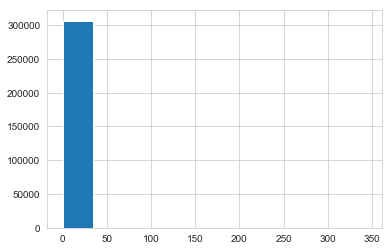

In [171]:
# 最大值落在分布之外
# print(app_train['OBS_60_CNT_SOCIAL_CIRCLE'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
import matplotlib.mlab as mlab  
import matplotlib.pyplot as plt  

def ecdf(data):
    xlist = [ ]
    ylist = [ ]
    number = data.shape[0]
    data = df.sort_values(by = 'OBS_60_CNT_SOCIAL_CIRCLE')
    for i in range(number):
        x = data['OBS_60_CNT_SOCIAL_CIRCLE'].iloc[i]
        y = i/number
        xlist.append(np.log(x))  #不然 x range太大了
        ylist.append(y)
    xmin =xlist[0]
    xmax = xlist[int(len(xlist))-1]
    plt.plot(xlist,ylist, marker = '.', markersize = 3, label = 'raw data')
    plt.legend(markerscale = 4)
#     plt.xlim(xmin,xmax*1.05)# 限制顯示圖片的範圍
#     plt.ylim(0,1.05) # 限制顯示圖片的範圍
    plt.xlabel('Value') 
    plt.ylabel('ECDF') 
    return plt.show()




plt.hist(df['OBS_60_CNT_SOCIAL_CIRCLE'])

# print(df['OBS_60_CNT_SOCIAL_CIRCLE'].value_counts().sort_index(ascending = False))


## 注意：當 histogram 畫出上面這種圖 (只出現一條，但是 x 軸延伸很長導致右邊有一大片空白時，代表右邊有值但是數量稀少。這時可以考慮用 value_counts 去找到這些數值

(array([2.13536e+05, 4.99810e+04, 2.34090e+04, 1.06930e+04, 4.84500e+03,
        2.17200e+03, 1.02100e+03, 4.04000e+02, 2.10000e+02, 9.30000e+01]),
 array([ 0. ,  1.9,  3.8,  5.7,  7.6,  9.5, 11.4, 13.3, 15.2, 17.1, 19. ]),
 <a list of 10 Patch objects>)

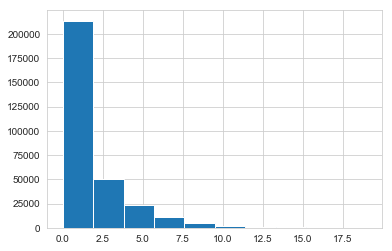

In [182]:
# 把一些極端值暫時去掉，在繪製一次 Histogram
# 選擇 OBS_60_CNT_SOCIAL_CIRCLE 小於 20 的資料點繪製

df ['OBS_60 Bool'] = df['OBS_60_CNT_SOCIAL_CIRCLE'].apply(lambda x: x <20)

histlist = [ ]
for i in range(df.shape[0]):
    if df ['OBS_60 Bool'].iloc[i] ==True:
        histlist.append(df['OBS_60_CNT_SOCIAL_CIRCLE'].iloc[i])
        
plt.hist(histlist)